In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import bezier

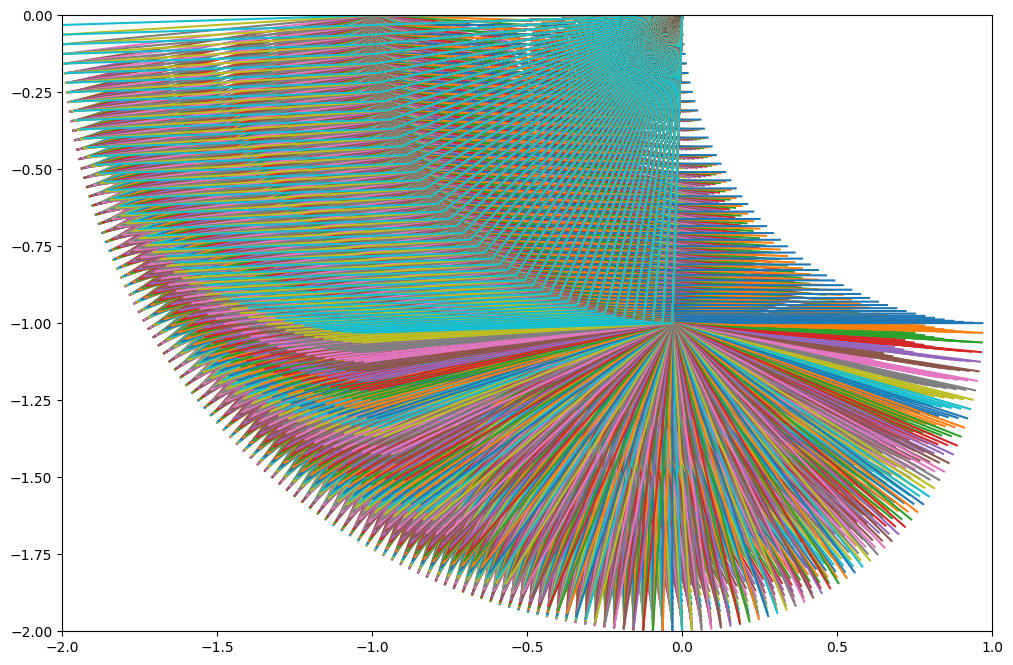

In [2]:
theta_shoulder = np.arange(0,math.pi/2,math.pi/100)
theta_elbow = np.arange(0,math.pi,math.pi/100)

joint1 = np.array([[-math.cos(theta),-math.sin(theta)] for theta in theta_shoulder])
joint2 = np.array([[-math.cos(theta),-math.sin(theta)] for theta in theta_elbow])

plt.figure(figsize=(12, 8))
plt.ylim(top=0,bottom=-2)
plt.xlim(-2,1)

for pos1 in joint1:
    for pos2 in joint2:
        final_pos = [pos1[0]-pos2[0],pos1[1]+pos2[1]]
        plt.plot([0,pos1[0],final_pos[0]],[0,pos1[1],final_pos[1]])

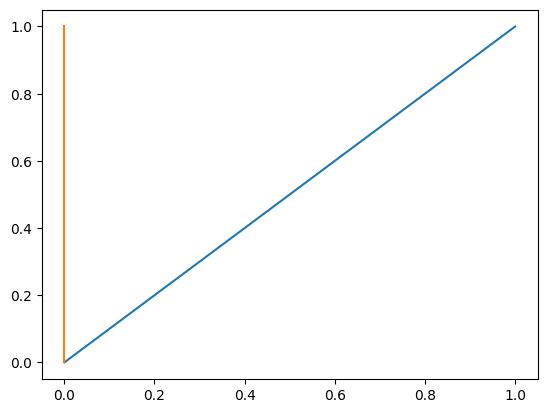

In [3]:
plt.plot([0,1],[0,1])
plt.plot([0,0],[0,1])

In [18]:
# 2D Inverse model based on https://www.adham-e.dev/pdf/IK_Model.pdf

In [4]:
def inverse_xy(x,y,l_s,l_e):
    d = math.sqrt(x**2+y**2)
    q = math.acos(-y/d)
    print(d,q/math.pi*180)
    theta_s = math.acos((l_s**2 + d**2 - l_e**2)/(2*l_s*d))-q
    theta_e = math.acos((l_e**2 + l_s**2 - d**2)/(2*l_e*l_e))-math.pi/2+theta_s
    print("thetas:",theta_s/math.pi*180,theta_e/math.pi*180)
    return [theta_s, theta_e]

def display_inverse(t,x,y,l_s,l_e):
    l = [l_s,l_e]
    elbow = np.array([-l_s * math.sin(t[0]),-l_s * math.cos(t[0])])
    foot = np.array([l_e * math.cos(t[1]), -l_e * math.sin(t[0])])
    ee = elbow+foot
    print("elbow",elbow,"foot",foot,"ee",ee)
    plt.figure(figsize=(8, 8))
    plt.ylim(top=2,bottom=-2)
    plt.xlim(-2,2)
    plt.plot([0,elbow[0]],[0,elbow[1]],linewidth=7.0)
    plt.plot([0,foot[0]],[0,foot[1]],linewidth=7.0)
    plt.plot([0,elbow[0],ee[0]],[0,elbow[1],ee[1]],'-bo',markersize=10)
    plt.plot(ee[0],ee[1],'ro',markersize=10)
    plt.plot([1,1,-1,-1],[1,-1,1,-1], 'go')

1.0 90.0
thetas: -29.999999999999993 -59.999999999999986
elbow [ 0.5       -0.8660254] foot [0.5 0.5] ee [ 1.        -0.3660254]


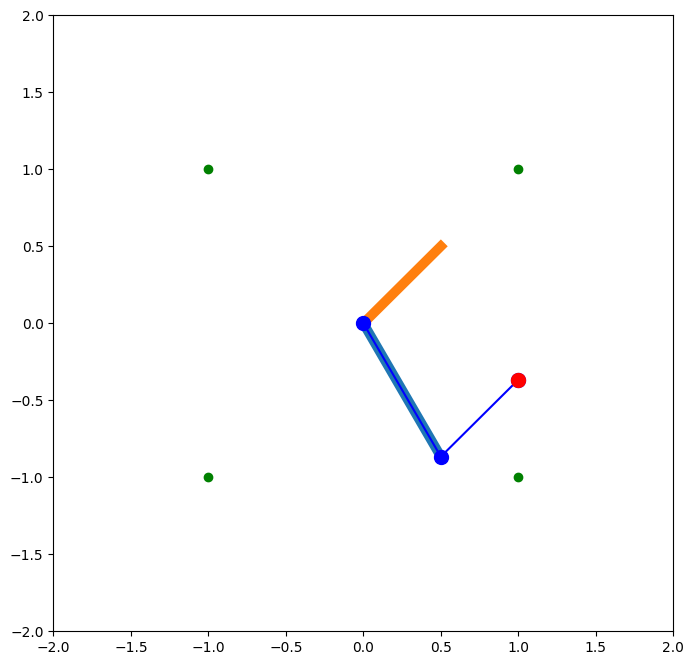

In [5]:
x,y = 1,0
l_s, l_e = 1,1
t = inverse_xy(x,y,l_s,l_e)
display_inverse(t,x,y,l_s,l_e)

In [21]:
#np.append(slide[0],step[0])

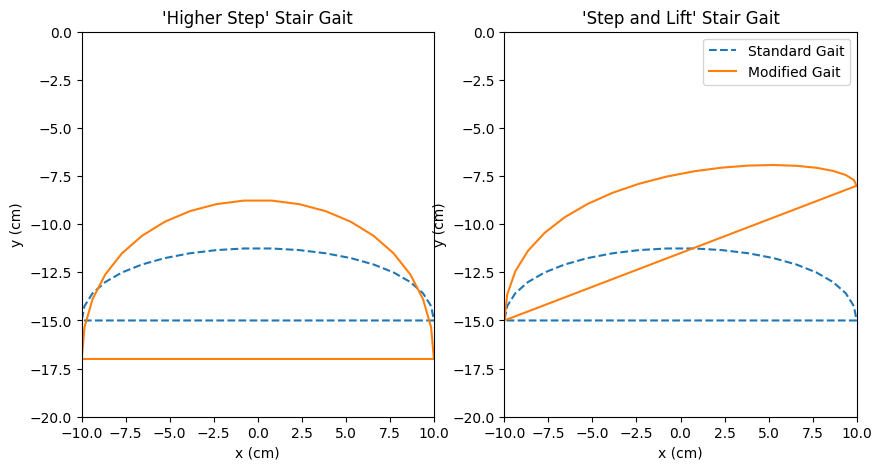

In [6]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
 
step_nodes = np.asfortranarray([
    [-10.0, -10.0, 10.0, 10.0],
    [-15.0, -10, -10, -15.0],
])
curve = bezier.Curve(step_nodes, degree=3)
s_vals = np.linspace(0.0, 1.0, 20)
step = curve.evaluate_multi(s_vals)

slide_nodes = np.asfortranarray([
    [10.0, -10.0],
    [-15.0, -15.0],
])
curve = bezier.Curve(slide_nodes, degree=1)
s_vals = np.linspace(0.0, 1.0, 20)
slide = curve.evaluate_multi(s_vals)
ax1.plot(np.append(slide[0],step[0]),np.append(slide[1],step[1]), label= "Standard Gait", linestyle="--")
ax2.plot(np.append(slide[0],step[0]),np.append(slide[1],step[1]), label= "Standard Gait", linestyle="--")

step_nodes = np.asfortranarray([
    [-10.0, -10.0, 10.0, 10.0],
    [-17.0, -6, -6, -17.0],
])
curve = bezier.Curve(step_nodes, degree=3)
s_vals = np.linspace(0.0, 1.0, 20)
step = curve.evaluate_multi(s_vals)
# plt.plot(step[0],step[1])


slide_nodes = np.asfortranarray([
    [10.0, -10.0],
    [-17.0, -17.0],
])
curve = bezier.Curve(slide_nodes, degree=1)
s_vals = np.linspace(0.0, 1.0, 20)
slide = curve.evaluate_multi(s_vals)
ax1.plot(np.append(slide[0],step[0]),np.append(slide[1],step[1]), label= "Modified Gait")

step_nodes = np.asfortranarray([
    [-10.0, -10.0, 10.0, 10.0],
    [-15.0, -6, -6, -8.0],
])
curve = bezier.Curve(step_nodes, degree=3)
s_vals = np.linspace(0.0, 1.0, 20)
step = curve.evaluate_multi(s_vals)

slide_nodes = np.asfortranarray([
    [10.0, -10.0],
    [-8.0, -15.0],
])
curve = bezier.Curve(slide_nodes, degree=1)
s_vals = np.linspace(0.0, 1.0, 20)
slide = curve.evaluate_multi(s_vals)
ax2.plot(np.append(slide[0],step[0]),np.append(slide[1],step[1]), label= "Modified Gait")


ax1.set_ylim(-20,0)
ax1.set_xlim(-10,10)
ax2.set_ylim(-20,0)
ax2.set_xlim(-10,10)
ax1.set_title("'Higher Step' Stair Gait")
ax2.set_title("'Step and Lift' Stair Gait")
ax1.set_ylabel("y (cm)")
ax1.set_xlabel("x (cm)")
ax2.set_ylabel("y (cm)")
ax2.set_xlabel("x (cm)")
ax2.legend()
plt.show()

In [7]:
np.arange(0,1,0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [8]:
def generate_pos(x,y,a1=10,a2=10):
    if (math.sqrt(x**2+y**2) < (a1 - a2) or math.sqrt(x**2+y**2) > (a1 + a2)):
        print("invalid x,y parameters")

    c2 = (x**2+y**2-a1**2-a2**2)/(2*a1*a2)
    s2 = math.sqrt(1-c2**2)
    theta2 = math.atan2(s2,c2)
    c2 = math.cos(theta2)
    s2 = math.sin(theta2)

    c1 = (x*(a1+(a2*c2)) + y*(a2*s2))/(x**2+y**2)
    s1 = (y*(a1+(a2*c2)) - x*(a2*s2))/(x**2+y**2)
    theta1 = math.atan2(s1,c1)
    c1 = math.cos(theta1)
    s1 = math.sin(theta1)

    P2 = [a1*c1, a1*s1]
    P3 = [x, y]
    return P2,P3

def generate_angles(x,y,a1=10,a2=10):
    c2 = (x**2+y**2-a1**2-a2**2)/(2*a1*a2)
    s2 = math.sqrt(1-c2**2)
    theta2 = math.atan2(s2,c2)
    c2 = math.cos(theta2)
    s2 = math.sin(theta2)

    c1 = (x*(a1+(a2*c2)) + y*(a2*s2))/(x**2+y**2)
    s1 = (y*(a1+(a2*c2)) - x*(a2*s2))/(x**2+y**2)
    theta1 = math.atan2(s1,c1)
    # generate positions with respect to robot motors
    theta_shoulder = -theta1
    theta_elbow = theta_shoulder - theta2
    return theta_shoulder,theta_elbow

In [10]:
import matplotlib.animation as ani
%matplotlib notebook

foot_motion = step
for x,y in zip(slide[0],slide[1]):
    new_x=np.append(foot_motion[0],x)
    new_y=np.append(foot_motion[1],y)
    foot_motion = [new_x,new_y]
    
fig = plt.figure(figsize=(5,5))


def animate(i):
    
    plt.clf()
    x = foot_motion[0][i]
    y = foot_motion[1][i]
    P2,P3 = generate_pos(x,y)
    plt.plot(step[0],step[1])
    plt.plot(slide[0],slide[1])
    plt.plot([0,P2[0]],[0,P2[1]])
    plt.plot([P2[0],P3[0]],[P2[1],P3[1]])
    plt.plot([0,P3[0]],[0,P3[1]])
    plt.plot([P2[0],P2[0]+5],[P2[1],P2[1]],'--')
    plt.xlim(-10,10)
    plt.ylim(-20,0)
    theta_shoulder,theta_elbow = generate_angles(x,y)
    plt.legend([f"shoulder:{theta_shoulder}",f"elbow:{theta_elbow}"])
    
anim = ani.FuncAnimation(fig, animate, frames=40, interval=40)
writergif = ani.PillowWriter(fps=30)
anim.save('single_leg_gait.gif',writer=writergif)

<IPython.core.display.Javascript object>

/mnt/data/src/Robotics/quadruped-robot-main/.venv/lib/python3.12/site-packages/matplotlib/animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(
